# Deal Cards

Assignment Brief:
look at the the page

Deck of Cards API    https://deckofcardsapi.com/

This is an API that simulates dealing a deck of cards

Write a program that "deals" (prints out) 5 cards

first you need to shuffle

https://deckofcardsapi.com/api/deck/new/shuffle/?deck_count=1

get the deck_id, 

with the deck_id you can get the cards

https://deckofcardsapi.com/api/deck/<<deck_id>>/draw/?count=2

This example gets two cards

From there you need to print the value and the suit of each card.

save the file as assignment2-carddraw.py (or as a notebook)

Last few marks:
Check if the user has drawn a pair, triple, straight, or all of the same suit and congratulate the user.

### Import the required Libraries

In [7]:
import requests
import json
from xml.dom.minidom import parseString
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

### Shuffle the deck

In [8]:
#Shuffle a deck of cards by making a request to the deckofcardsapi.com API
shuffle_deck = "https://deckofcardsapi.com/api/deck/new/shuffle/?deck_count=1"

response = requests.get(shuffle_deck)

data = response.json()
#Get the deck_id from the shuffled deck as we will use this deck to draw 5 cards
deck_id = data['deck_id']

print(deck_id) #Testing purposes


smdhcwgo8hcp


In [9]:
#Draw 5 cards from the deck	and assign the card values to a list
draw_cards = f"https://deckofcardsapi.com/api/deck/{deck_id}/draw/?count=5"

response2 = requests.get(draw_cards)

data1 = response2.json()

In [10]:
#Create a list to store the card values
card_hand = []
#Add the card values to our list
for card in data1['cards']:
    card_hand.append(card['code'])
    card_hand.append(card['value'])
    card_hand.append(card['suit'])
    card_hand.append(card['images']['png'])
    print(f"{card['value']} of {card['suit']}")
    

JACK of DIAMONDS
5 of DIAMONDS
9 of HEARTS
9 of DIAMONDS
QUEEN of DIAMONDS


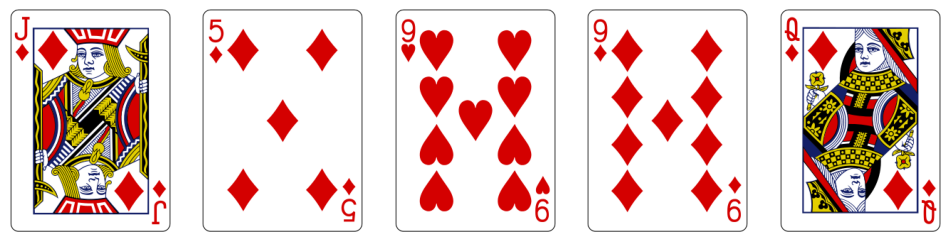

In [11]:
#Save a a json file to the data folder
with open('data/card_hand.json', 'w') as f:
    json.dump(data1, f)

#Display the card hand dealt
fig, ax = plt.subplots(1,5, figsize=(12,6))
for i in range(5):
    url = data1['cards'][i]['images']['png']
    img = Image.open(requests.get(url, stream = True).raw)
    ax[i].imshow(img)
    ax[i].axis('off')
plt.show()

In [12]:
#Check for a pair, three of a kind or four of a kind in the card hand
#Create a dictionary to store the card values
card_dict = {}
#Add the card values to the dictionary
for card in data1['cards']:
    if card['value'] in card_dict:
        card_dict[card['value']] += 1
    else:
        card_dict[card['value']] = 1

#Check for a pair, three of a kind or four of a kind in the card hand
for card in card_dict:
    if card_dict[card] == 2:
        print(f"Pair of {card}")
    elif card_dict[card] == 3:
        print(f"Three of a kind {card}")
    elif card_dict[card] == 4:
        print(f"Four of a kind {card}")


Pair of 9
